In [1]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm_notebook as tq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
all_cats = sorted(['Environmental Sciences', 'Chemistry, Analytical', 'Oncology','Psychology, Developmental','Hospitality, Leisure, Sport & Tourism','Chemistry, Multidisciplinary', 'Astronomy & Astrophysics','Biotechnology & Applied Microbiology', 'Chemistry, Organic','Pharmacology & Pharmacy', 'Virology','Cardiac & Cardiovascular Systems', 'Ophthalmology','Marine & Freshwater Biology', 'Chemistry, Physical','Biochemistry & Molecular Biology', 'Clinical Neurology','Dermatology', 'Surgery', 'Physics, Multidisciplinary','Medical Laboratory Technology', 'Multidisciplinary Sciences','Nuclear Science & Technology', 'Medicine, General & Internal','Materials Science, Multidisciplinary', 'Engineering, Chemical','Computer Science, Information Systems', 'Mathematics','Medicine, Research & Experimental', 'Biodiversity Conservation','Urology & Nephrology', 'Dentistry, Oral Surgery & Medicine','Fisheries', 'Geochemistry & Geophysics', 'Physics, Mathematical','Veterinary Sciences', 'Physics, Atomic, Molecular & Chemical','Engineering, Environmental', 'Polymer Science', 'Plant Sciences','Chemistry, Inorganic & Nuclear', 'Engineering, Biomedical','Meteorology & Atmospheric Sciences', 'Endocrinology & Metabolism','Psychology, Multidisciplinary', 'Mathematics, Applied','Physics, Condensed Matter', 'Immunology', 'Cell Biology','Microbiology', 'Electrochemistry', 'Neurosciences', 'Acoustics','Public, Environmental & Occupational Health','Computer Science, Theory & Methods', 'Otorhinolaryngology','Genetics & Heredity', 'Physiology', 'Paleontology', 'Optics','Zoology', 'Agronomy', 'Psychology, Clinical', 'Mineralogy','Rehabilitation', 'Engineering, Mechanical','Statistics & Probability', 'Critical Care Medicine','Nutrition & Dietetics', 'Pathology', 'Ecology', 'Allergy','Biochemical Research Methods', 'Rheumatology','Metallurgy & Metallurgical Engineering', 'Physics, Applied','Economics', 'Crystallography', 'Materials Science, Ceramics','Psychology, Experimental', 'Pediatrics','Agricultural Engineering','Radiology, Nuclear Medicine & Medical Imaging','Gastroenterology & Hepatology', 'Education & Educational Research','Engineering, Aerospace', 'Physics, Particles & Fields','Behavioral Sciences', 'Agriculture, Multidisciplinary','Engineering, Electrical & Electronic','Peripheral Vascular Disease', 'Food Science & Technology','Mechanics', 'Anesthesiology', 'Engineering, Multidisciplinary','Business, Finance', 'Hematology', 'Computer Science, Cybernetics','Business', 'Computer Science, Interdisciplinary Applications','Infectious Diseases', 'Geography', 'Andrology','Instruments & Instrumentation', 'Psychology, Biological','Gerontology', 'Thermodynamics','Education, Scientific Disciplines', 'Entomology', 'Family Studies','Agriculture, Dairy & Animal Science', 'Developmental Biology','Psychology, Educational', 'Oceanography', 'Parasitology','Spectroscopy', 'Biophysics', 'Anatomy & Morphology','Chemistry, Applied', 'Computer Science, Software Engineering','Obstetrics & Gynecology', 'Nursing', 'Substance Abuse','Psychology', 'Mathematical & Computational Biology','Audiology & Speech-Language Pathology', 'Psychology, Social','Medicine, Legal', 'Geosciences, Multidisciplinary', 'Orthopedics','Political Science', 'Psychology, Applied', 'Biology', 'Psychiatry','Chemistry, Medicinal', 'Emergency Medicine', 'Horticulture','Forestry', 'Education, Special', 'Management','Reproductive Biology', 'Physics, Fluids & Plasmas','Physics, Nuclear', 'Ornithology', 'History', "Women's Studies",'Art', 'Computer Science, Hardware & Architecture','Social Sciences, Interdisciplinary','Agricultural Economics & Policy', 'Mycology','Operations Research & Management Science', 'Respiratory System','Soil Science', 'Remote Sensing', 'Ethics', 'Geology', 'Microscopy','Law', 'Automation & Control Systems', 'Psychology, Mathematical','Transplantation', 'Sociology', 'Geriatrics & Gerontology','Literature', 'Toxicology', 'Materials Science, Paper & Wood','Materials Science, Coatings & Films', 'Engineering, Civil','Health Care Sciences & Services','Information Science & Library Science','Materials Science, Composites', 'Sport Sciences','Construction & Building Technology', 'Linguistics', 'Anthropology','Tropical Medicine', 'Computer Science, Artificial Intelligence','Criminology & Penology', 'Demography', 'Geography, Physical','Nanoscience & Nanotechnology', 'Primary Health Care','Social Work', 'Engineering, Geological','Engineering, Manufacturing', 'Environmental Studies', 'Limnology','Communication', 'Health Policy & Services','Language & Linguistics', 'Planning & Development', 'Social Issues','Public Administration','Mathematics, Interdisciplinary Applications','History & Philosophy Of Science', 'Psychology, Psychoanalysis','Water Resources', 'Engineering, Industrial','Energy & Fuels','Materials Science, Characterization & Testing','Engineering, Ocean', 'Materials Science, Textiles', 'Archaeology','Imaging Science & Photographic Technology','Industrial Relations & Labor', 'Classics', 'Philosophy','Social Sciences, Mathematical Methods', 'Robotics', 'Music','Area Studies', 'Telecommunications', 'Engineering, Marine','Literature, American', 'Literature, German, Dutch, Scandinavian','Evolutionary Biology', 'International Relations', 'Ergonomics','Folklore', 'Humanities, Multidisciplinary','Literature, British Isles', 'Religion', 'Film, Radio, Television','Transportation', 'Integrative & Complementary Medicine','Medieval & Renaissance Studies', 'History Of Social Sciences','Literature, Slavic', 'Literature, Romance', 'Ethnic Studies','Architecture', 'Cultural Studies', 'Literary Theory & Criticism','Urban Studies', 'Materials Science, Biomaterials', 'Poetry','Literary Reviews', 'Asian Studies','Literature, African, Australian, Canadian', 'Theater', 'Logic','Mining & Mineral Processing', 'Cell & Tissue Engineering','Transportation Science & Technology', 'Engineering, Petroleum','Dance', 'Social Sciences, Biomedical', 'Medical Informatics','Medical Ethics', 'Neuroimaging'])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [6]:
bins = np.arange(0,2,.01)

#%time acc_df_wos = pd.read_pickle('/Users/jaredlorince/Desktop/temp_data/eval_wos/acc_df.pkl')
#%time acc_df_elsevier = pd.read_pickle('/Users/jaredlorince/Desktop/temp_data/eval_elsevier/acc_df.pkl')

CPU times: user 43.2 s, sys: 8.89 s, total: 52.1 s
Wall time: 59.8 s


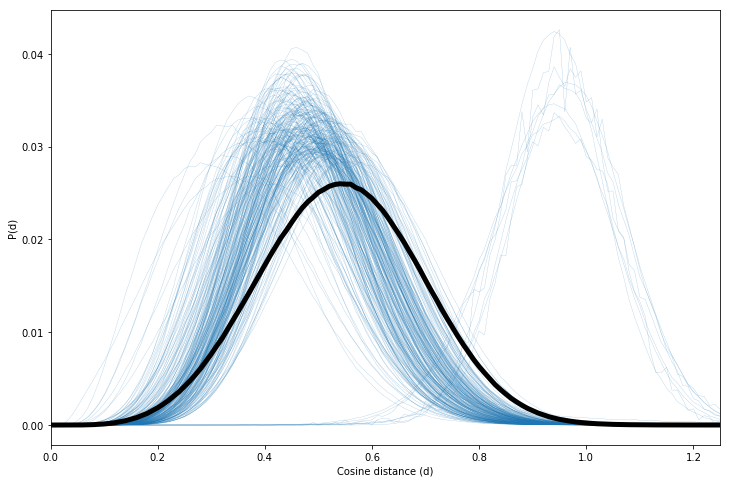

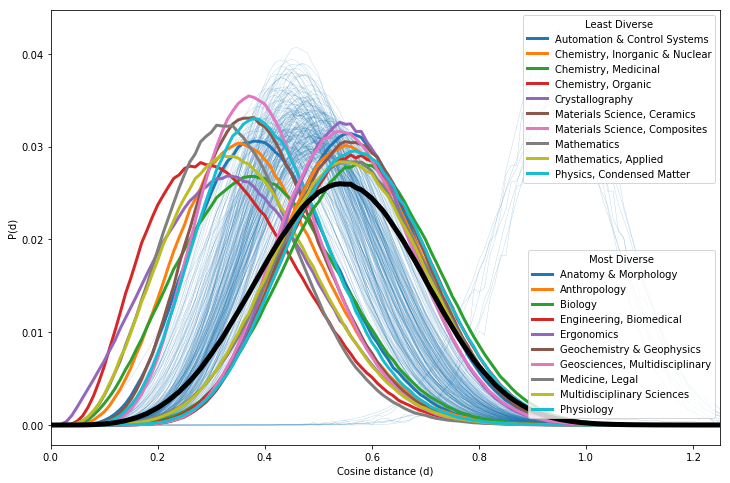

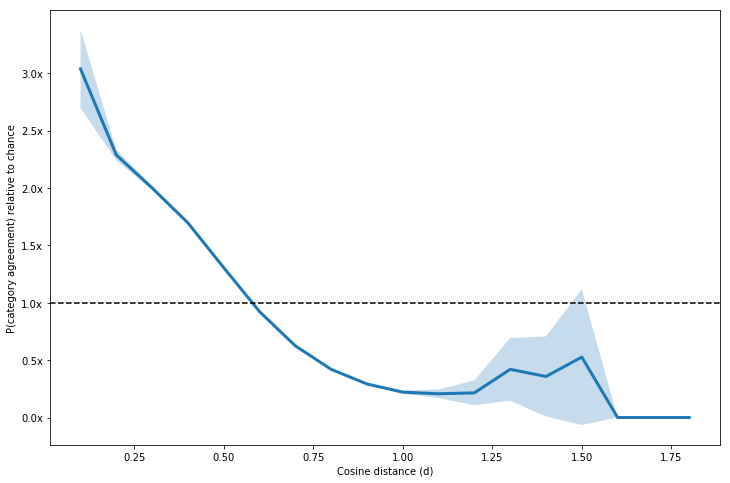

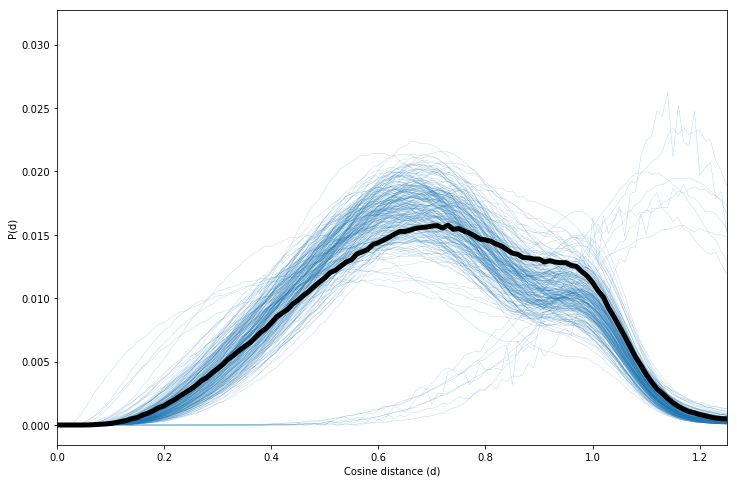

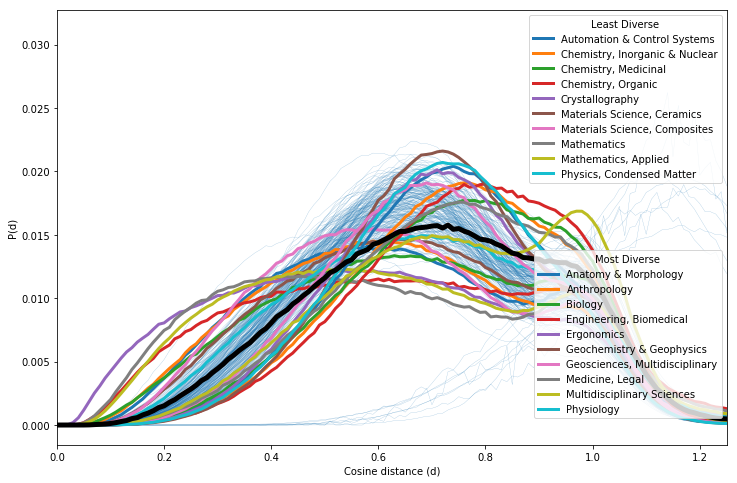

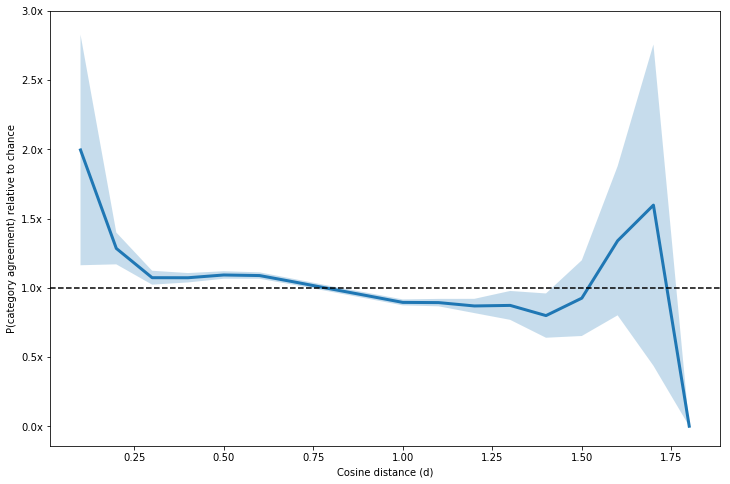

In [12]:
for d in ('/Users/jaredlorince/Desktop/temp_data/eval_wos/100-5-5/','/Users/jaredlorince/Desktop/temp_data/eval_wos/200-10-50/'):
    
    #df = vars()['acc_df_'+mode]
    df = pd.read_pickle(d+'acc_df.pkl')

    cat_results = pickle.load(open('{}cat_results.pkl'.format(d),'rb'))
    cat_results_binned = pickle.load(open('{}cat_results_binned.pkl'.format(d),'rb'))
#     least_diverse = pd.Series(index=all_cats,data=[cat_results[i].ix['mean']  for i in range(251)]).dropna().sort_values()[:10]
#     most_diverse = pd.Series(index=all_cats,data=[cat_results[i].ix['mean'] for i in range(251)]).dropna().sort_values()[-18:-8]
    
    fig,ax = plt.subplots(1,1,figsize=(12,8))
    bins = np.arange(0,2,.01)
    for r in range(251):
        plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)

    vals = np.histogram(df.dist,bins=bins)[0]
    plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')

    plt.xlabel('Cosine distance (d)')
    plt.ylabel('P(d)')
    plt.xlim(0,1.25)


    fig,ax = plt.subplots(1,1,figsize=(12,8))
    bins = np.arange(0,2,.01)
    for r in range(251):
        if all_cats[r] not in list(least_diverse.index)+list(most_diverse.index):
            plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)
        if cat_results_binned[r].sum()<2000000:
            #print(all_cats[r])#,results[r].sum())
            pass
    lines_a = []
    lines_b = []
    for r in range(251):
        if all_cats[r] in list(least_diverse.index):
            lines_a += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
    for r in range(251):
        if all_cats[r] in list(most_diverse.index):
            lines_b += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
            # Add the legend manually to the current Axes.
    
    vals = np.histogram(df.dist,bins=bins)[0]
    plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')
    
    first_legend = plt.legend(handles=lines_a,loc='upper right',title='Least Diverse')# bbox_to_anchor=(1.25,1))
    ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    plt.legend(handles=lines_b, loc='lower right',bbox_to_anchor=(1,0.05),title='Most Diverse')

    plt.xlabel('Cosine distance (d)')
    plt.ylabel('P(d)')
    plt.xlim(0,1.25)


    bins = np.arange(0,2,.1)
    m = df.groupby(np.digitize(df.dist,bins=bins)).agree.mean() 
    ci = df.groupby(np.digitize(df.dist,bins=bins)).agree.apply(lambda x: 1.96 * np.std(x)/np.sqrt(len(x)))
    fig,ax = plt.subplots(1,1,figsize=(12,8))
    x = bins[m.index]
    ax.plot(x,m.values,lw=3)#,marker='.',ms=10)
    ax.fill_between(x,m+ci,m-ci,alpha=.25)
    ax.set_xlabel('Cosine distance (d)')
    ax.set_ylabel('P(category agreement) relative to chance');
    ax.axhline(df.agree.mean(),c='k',ls='--')
    ax.set_yticks(np.arange(0,3.1,.5)*df.agree.mean())
    ax.set_yticklabels(["{}x".format(t) for t in np.arange(0,3.1,.5)])
    
    


(0, 2)

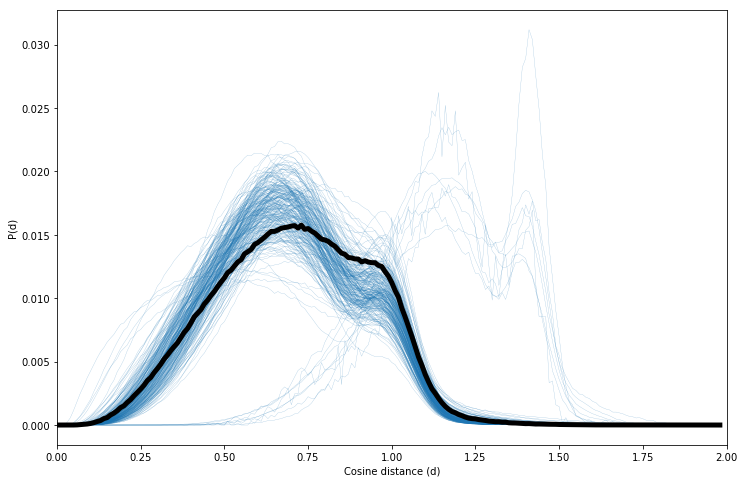

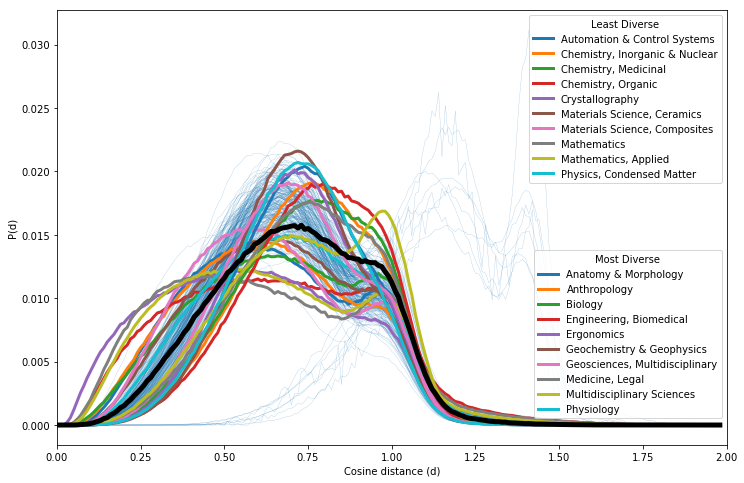

In [13]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)

vals = np.histogram(df.dist,bins=bins)[0]
plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')

plt.xlabel('Cosine distance (d)')
plt.ylabel('P(d)')
plt.xlim(0,2)


fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    if all_cats[r] not in list(least_diverse.index)+list(most_diverse.index):
        plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)
    if cat_results_binned[r].sum()<2000000:
        #print(all_cats[r])#,results[r].sum())
        pass
lines_a = []
lines_b = []
for r in range(251):
    if all_cats[r] in list(least_diverse.index):
        lines_a += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
for r in range(251):
    if all_cats[r] in list(most_diverse.index):
        lines_b += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
        # Add the legend manually to the current Axes.

vals = np.histogram(df.dist,bins=bins)[0]
plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')

first_legend = plt.legend(handles=lines_a,loc='upper right',title='Least Diverse')# bbox_to_anchor=(1.25,1))
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=lines_b, loc='lower right',bbox_to_anchor=(1,0.05),title='Most Diverse')

plt.xlabel('Cosine distance (d)')
plt.ylabel('P(d)')
plt.xlim(0,2)


In [17]:
mode = 'elsevier'
df = vars()['acc_df_elsevier']

cat_results = pickle.load(open('/Users/jaredlorince/Desktop/temp_data/eval_{}/100-10-100/cat_results.pkl'.format(mode),'rb'))
cat_results_binned = pickle.load(open('/Users/jaredlorince/Desktop/temp_data/eval_{}/100-10-100/cat_results_binned.pkl'.format(mode),'rb'))
least_diverse = pd.Series(index=all_cats,data=[cat_results[i].ix['mean']  for i in range(251)]).dropna().sort_values()[:10]
most_diverse = pd.Series(index=all_cats,data=[cat_results[i].ix['mean'] for i in range(251)]).dropna().sort_values()[-18:-8]

fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)

#vals = np.histogram(df.dist,bins=bins)[0]
vals = np.array([     0,      0,      0,      0,      0,      0,      0,      0,
            4,      9,     22,     31,     46,     64,     80,    119,
          146,    207,    202,    265,    333,    332,    442,    497,
          545,    636,    716,    808,    930,   1047,   1261,   1312,
         1501,   1702,   1813,   2152,   2588,   2768,   3172,   3734,
         4259,   5017,   5872,   6805,   7793,   9160,  10686,  12373,
        14915,  17094,  20129,  23955,  28307,  32784,  38700,  44978,
        52968,  61547,  71620,  82578,  96100, 110642, 127562, 145941,
       165905, 189061, 213854, 240409, 269665, 300562, 332536, 367442,
       403889, 440226, 477365, 516782, 553107, 592730, 627372, 661126,
       692699, 722657, 746600, 766960, 783529, 795315, 798287, 799276,
       793543, 779253, 764923, 740825, 711779, 680139, 644567, 605399,
       565654, 522434, 479279, 435648, 391671, 350253, 310964, 273083,
       237447, 205056, 174937, 148727, 125197, 104598,  86343,  70885,
        57215,  46167,  36997,  29469,  23175,  18444,  14228,  11397,
         8666,   6827,   5313,   4120,   3261,   2531,   2041,   1654,
         1288,   1067,    871,    700,    571,    465,    402,    349,
          257,    224,    175,    131,    147,     93,     87,     68,
           72,     51,     44,     43,     22,     20,     14,     11,
           24,     12,      5,      9,      7,      6,     10,      4,
            1,      3,      4,      2,      1,      2,      1,      1,
            1,      0,      1,      0,      0,      0,      1,      0,
            0,      0,      0,      0,      0,      0,      1,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0])
plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')

plt.xlabel('Cosine distance (d)')
plt.ylabel('P(d)')
plt.xlim(0,1.25)


fig,ax = plt.subplots(1,1,figsize=(12,8))
bins = np.arange(0,2,.01)
for r in range(251):
    if all_cats[r] not in list(least_diverse.index)+list(most_diverse.index):
        plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=.25,c=colors[0],alpha=0.5)
    if cat_results_binned[r].sum()<2000000:
        #print(all_cats[r])#,results[r].sum())
        pass
lines_a = []
lines_b = []
for r in range(251):
    if all_cats[r] in list(least_diverse.index):
        lines_a += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
for r in range(251):
    if all_cats[r] in list(most_diverse.index):
        lines_b += plt.plot(bins[:-1],cat_results_binned[r]/cat_results_binned[r].sum(),lw=3,label=all_cats[r])
        # Add the legend manually to the current Axes.

#vals = np.histogram(df.dist,bins=bins)[0]
plt.plot(bins[:-1],vals/vals.sum(),lw=5,c='k',label='randomly sampled pairs')

first_legend = plt.legend(handles=lines_a,loc='upper right',title='Least Diverse')# bbox_to_anchor=(1.25,1))
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=lines_b, loc='lower right',bbox_to_anchor=(1,0.05),title='Most Diverse')

plt.xlabel('Cosine distance (d)')
plt.ylabel('P(d)')
plt.xlim(0,2)
#plt.legend(loc='upper right');


bins = np.arange(0,2,.1)
m = np.array([ 0.        ,  0.06598985,  0.06474706,  0.07785302,  0.08855641,
        0.08243619,  0.06056726,  0.04461793,  0.03514989,  0.03120712,
        0.03103363,  0.03306198,  0.03138599,  0.0291918 ,  0.02782071,
        0.07843137,  0.3125    ,  0.        ,  1.        ])
ci = np.array([  0.00000000e+00,   1.41534298e-02,   6.08335892e-03,
         3.54040486e-03,   1.81646532e-03,   7.96904546e-04,
         3.42835929e-04,   1.81471592e-04,   1.30262837e-04,
         1.37416223e-04,   2.23049802e-04,   5.58078662e-04,
         1.78223243e-03,   5.12496543e-03,   1.26724687e-02,
         5.21752735e-02,   2.27121079e-01,   0.00000000e+00,
         0.00000000e+00])
fig,ax = plt.subplots(1,1,figsize=(12,8))
x = bins[:-1]
ax.plot(x,m,lw=3)#,marker='.',ms=10)
ax.fill_between(x,m+ci,m-ci,alpha=.25)
ax.set_xlabel('Cosine distance (d)')
ax.set_ylabel('P(category agreement)');
ax.axhline(df.agree.mean(),c='k',ls='--')
ax.set_xlim(0,2)
ax.set_ylim(0,.1)




KeyError: 'acc_df_elsevier'

In [18]:
cry = pickle.load(open('/Users/jaredlorince/Desktop/temp_data/eval_wos/cat_results_year_summary.pkl','rb'))


In [19]:
m = pd.DataFrame({outer_k:{inner_k:cry[outer_k][inner_k][0] for inner_k in cry[outer_k]} for outer_k in cry})
std = pd.DataFrame({outer_k:{inner_k:cry[outer_k][inner_k][1] for inner_k in cry[outer_k]} for outer_k in cry})
n = pd.DataFrame({outer_k:{inner_k:cry[outer_k][inner_k][2] for inner_k in cry[outer_k]} for outer_k in cry})

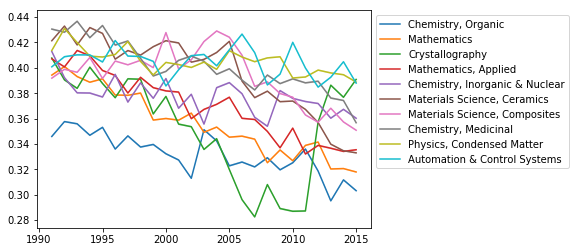

In [20]:
cat2idx = {cat:i for i,cat in enumerate(all_cats)}
for cat,name in [(cat2idx[c],c) for c in least_diverse.index]:
#    print(all_cats[cat])
    plt.plot(m[cat],label=name)
    ci =1.96*std/np.sqrt(n)
    plt.fill_between(m.index,m[cat]-ci[cat],m[cat]+ci[cat],alpha=.25)
plt.legend(bbox_to_anchor=(1,1))

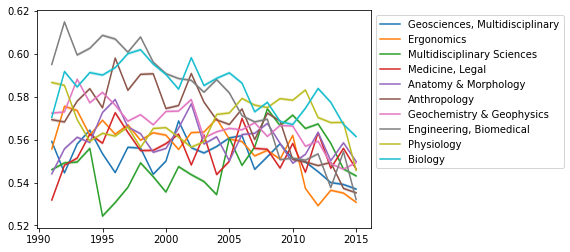

In [21]:
cat2idx = {cat:i for i,cat in enumerate(all_cats)}
for cat,name in [(cat2idx[c],c) for c in most_diverse.index]:
#    print(all_cats[cat])
    plt.plot(m[cat],label=name)
    ci =1.96*std/np.sqrt(n)
    plt.fill_between(m.index,m[cat]-ci[cat],m[cat]+ci[cat],alpha=.25)
plt.legend(bbox_to_anchor=(1,1))

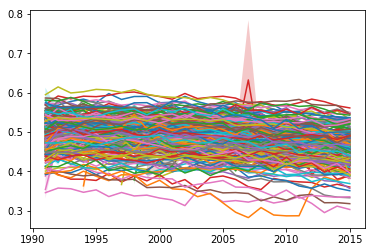

In [22]:
cat2idx = {cat:i for i,cat in enumerate(all_cats)}
for cat,name in [(cat2idx[c],c) for c in all_cats]:
#    print(all_cats[cat])
    plt.plot(m[cat],label=name)
    ci =1.96*std/np.sqrt(n)
    plt.fill_between(m.index,m[cat]-ci[cat],m[cat]+ci[cat],alpha=.25)
#plt.legend(bbox_to_anchor=(1,1))

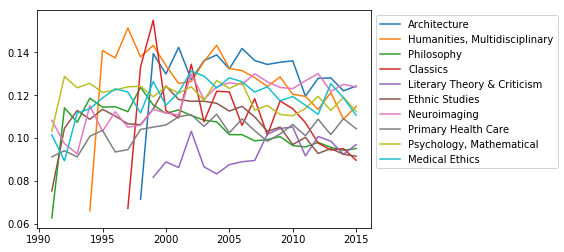

In [23]:
cat2idx = {cat:i for i,cat in enumerate(all_cats)}
for cat,name in [(c,all_cats[c]) for c in m.diff().mean(0).sort_values(ascending=False)[:10].index.values]:
#    print(all_cats[cat])
    plt.plot(((m**2)/2)[cat],label=name)
    ci =1.96*std/np.sqrt(n)
    #plt.fill_between(m.index,m[cat]-ci[cat],m[cat]+ci[cat],alpha=.25)
plt.legend(bbox_to_anchor=(1,1))

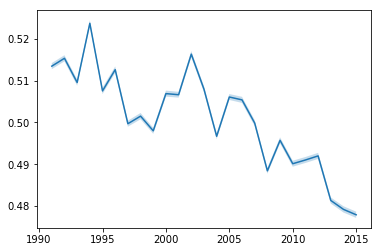

In [24]:
cat2idx = {cat:i for i,cat in enumerate(all_cats)}
for cat,name in [(cat2idx[c],c) for c in ('Biochemistry & Molecular Biology',)]:
#    print(all_cats[cat])
    plt.plot(m[cat],label=name)
    ci =1.96*std/np.sqrt(n)
    plt.fill_between(m.index,m[cat]-ci[cat],m[cat]+ci[cat],alpha=.25)
#plt.legend(bbox_to_anchor=(1,1))

In [25]:
cat_pubs_by_year = pd.read_pickle('/Users/jaredlorince/Desktop/temp_data/cat_pubs_by_year.pkl')


In [26]:
cat_pubs_by_year
cat_props_by_year = cat_pubs_by_year.divide(cat_pubs_by_year['ALL'],axis=0)

In [27]:
from scipy.stats import pearsonr
x = []
y = []
for i,cat in enumerate(all_cats):
    #x += list(m[i].values)
    #y += list(cat_props_by_year[cat])
    x.append(m[i].mean())
    y.append(cat_props_by_year[cat].mean())
    
    

In [28]:
# import seaborn as sns
# for i in range(251):
#     sns.regplot(m[i].index.values,m[i].values,marker='',ci=False)

In [29]:
from scipy.stats import linregress
x = []
for i in tq(range(251)):
    x.append(linregress(m[i].index.values,m[i].values))

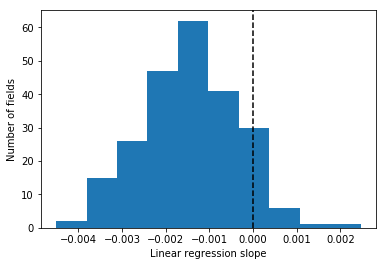

In [49]:
lr_data = pd.DataFrame({'slope':[lr.slope for lr in x],'p':[lr.pvalue for lr in x],'r':[lr.rvalue for lr in x]})
ax = lr_data.slope.hist(grid=False)
ax.set_ylabel('Number of fields')
ax.set_xlabel('Linear regression slope')
ax.axvline(0,ls='--',c='k')

In [47]:
x[cat2idx['Multidisciplinary Sciences']]

LinregressResult(slope=0.00088033520599943679, intercept=-1.2135585588611264, rvalue=0.50041377374062168, pvalue=0.010846335198343229, stderr=0.00031758914242971338)

In [50]:
cat2idx['Biochemistry & Molecular Biology']

21